In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [140]:
df_train = pd.read_csv('../data/raw/fetal_health.csv')

In [164]:
features = ['prolongued_decelerations','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability']

# X = df_train.drop('fetal_health',axis = 1)
X = df_train[features]
y = df_train[['fetal_health']]

#Set up a standard scaler for the features
col_names = list(X.columns)
sc = preprocessing.StandardScaler()
X_s= sc.fit_transform(X)
X_s = pd.DataFrame(X_s, columns=col_names)   
X_s.describe().T


,count,mean,std,min,25%,50%,75%,max
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [165]:
X_train, X_test,y_train,y_test = train_test_split(X_s,y,test_size = 0.33,random_state=42)

In [166]:
normal= df_train[(df_train['fetal_health'] == 1)]
suspect= df_train[(df_train['fetal_health'] == 2)]
pathological= df_train[(df_train['fetal_health'] == 3)]

In [167]:
X_train.shape, X_test.shape

((1424, 3), (702, 3))

We will compare classifiers.  

* k-nearest neighbors 
* naive bayes 
* decision tree 
* random forest 

## KNN

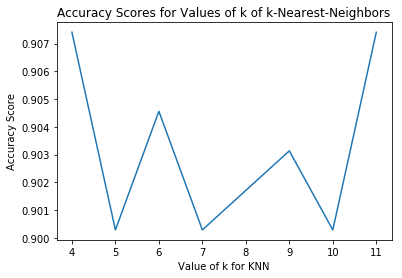

In [209]:
# experimenting with different n values
k_range = list(range(4,12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [210]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Accuracy: 0.8632478632478633
MAE: 0.16381766381766383


In [211]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Accuracy: 0.8632478632478633
MAE: 0.16381766381766383


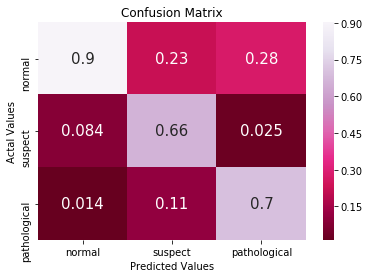

In [203]:
# confusion matrix
plt.subplots(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
sns.heatmap(cm_df/np.sum(cm_df), cmap='PuRd_r',annot = True, annot_kws = {'size':15})
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [204]:
# from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.16381766381766383

## Naive Bayes

In [173]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [174]:
y_pred  =  classifier.predict(X_test)

In [176]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Accuracy: 0.8333333333333334


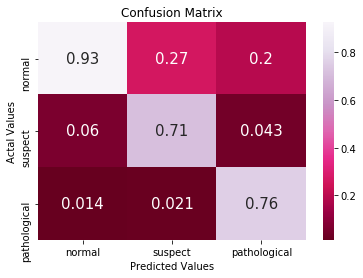

In [198]:
# confusion matrix
plt.subplots(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
sns.heatmap(cm_df/np.sum(cm_df), cmap='PuRd_r',annot = True, annot_kws = {'size':15})
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Decision tree

In [184]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [185]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Accuracy: 0.886039886039886


In [ ]:
# confusion matrix
plt.subplots(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
sns.heatmap(cm_df/np.sum(cm_df), cmap='PuRd_r',annot = True, annot_kws = {'size':15})
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Random Forest

In [212]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Accuracy: 0.9045584045584045
MAE: 0.11965811965811966


In [216]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -1}

In [217]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy


0.9173789173789174

In [220]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.9173789173789174
Recall      :  0.9173789173789174
Precision   :  0.9155646876507192
F1 Score    :  0.9173789173789174


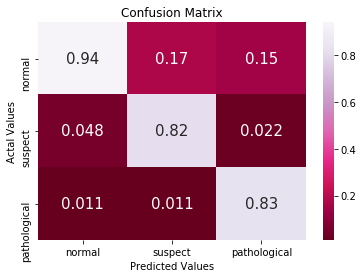

In [224]:
# confusion matrix
plt.subplots(figsize=(6,4))
cm = confusion_matrix(y_test, predictions)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
sns.heatmap(cm_df/np.sum(cm_df), cmap='PuRd_r',annot = True, annot_kws = {'size':15})
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()